 # Word size versus segment length

In [116]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [107]:
import os

language=os.getenv('language')
language='mongolian'

In [108]:
stage=f'NIST'

In [109]:
from glob import glob
transcripts = list(sorted(glob(f'{stage}/openasr20_{language}/build/transcription_split/*.txt')))
len(transcripts)

11042

In [110]:
sample_rate=8000

In [111]:
from tqdm import tqdm
import librosa
lengths=[]
for transcript_file in tqdm(transcripts):
    with open(transcript_file,'r') as f:
        sentence=f.read().strip().split(' ')
        n_words = len(sentence)
    audio_file = transcript_file.replace('/transcription_split/', '/audio_split/').replace('.txt','.wav')
    x_np,sr=librosa.load(audio_file, sr=sample_rate)
    n_samples = x_np.shape[0]
    lengths.append((n_samples, n_words, sentence, transcript_file, audio_file))

100%|██████████| 11042/11042 [00:01<00:00, 6699.86it/s]


Text(0.5, 1.0, 'mongolian: Sentence distribution in words and seconds')

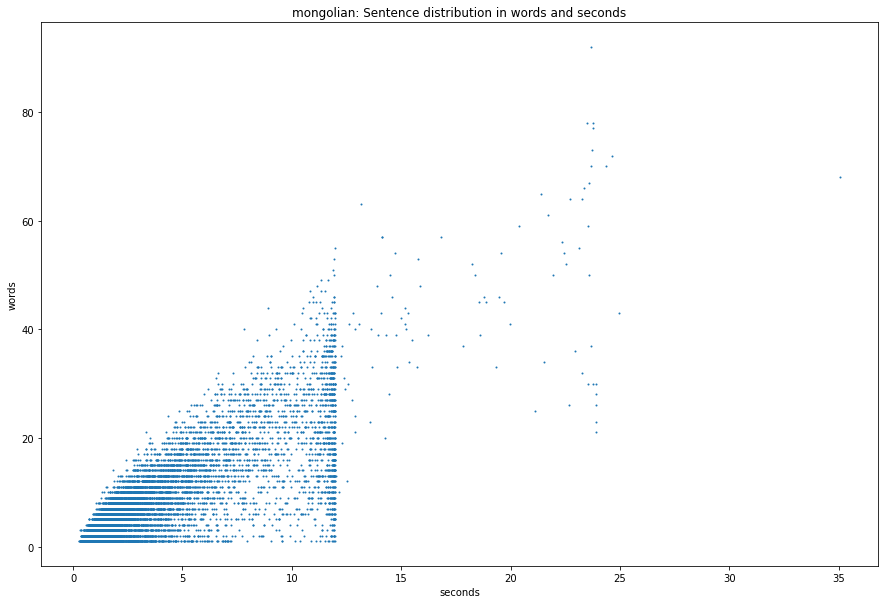

In [118]:
%matplotlib inline
from matplotlib.pylab import *
X=np.array([x for x,y,z,t,a in lengths])/sample_rate
Y=[y for x,y,z,t,a in lengths]
figure(figsize=(15,10))
scatter(X,Y,s=1);
xlabel('seconds')
ylabel('words')
title(f'{language}: Sentence distribution in words and seconds')

In [126]:
import numpy as np
samples_per_word=np.array(list(sorted([x/y for x,y,z,t,a in lengths])))/sample_rate

(0.0, 2.0)

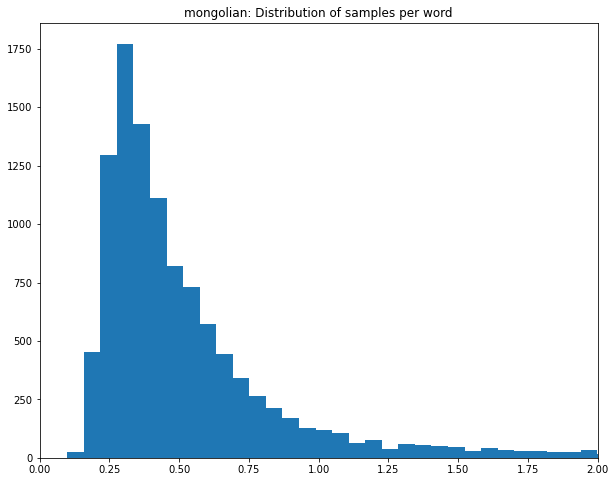

In [129]:
figure(figsize=(10,8))
hist(samples_per_word, bins=200);
title(f'{language}: Distribution of samples per word')
xlim(0,2)

In [135]:
cutoff=samples_per_word[int(samples_per_word.shape[0]*0.95)]*sample_rate
cutoff

13440.0

In [138]:
[(x,y,z,t,a) for x,y,z,t,a in lengths if x/y > 95000]

[(95599,
  1,
  ['мм'],
  'NIST/openasr20_mongolian/build/transcription_split/BABEL_OP3_401_35143_20141010_163440_inLine_042_505.105_517.055.txt',
  'NIST/openasr20_mongolian/build/audio_split/BABEL_OP3_401_35143_20141010_163440_inLine_042_505.105_517.055.wav'),
 (95760,
  1,
  ['ммхм'],
  'NIST/openasr20_mongolian/build/transcription_split/BABEL_OP3_401_63906_20141124_212323_inLine_041_508.415_520.385.txt',
  'NIST/openasr20_mongolian/build/audio_split/BABEL_OP3_401_63906_20141124_212323_inLine_041_508.415_520.385.wav')]